<a href="https://colab.research.google.com/github/juandesages/PDI.Entregas/blob/main/TP1/TP1_Desages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


In [73]:
#Cargar imagen
def load_image(filename):
    im_in=np.clip(imageio.imread(filename),0,255).astype(np.float)/255. 
    #imagen normalizada
    im=np.zeros((*im_in.shape[:2],3))
    image_type = 'RGB'
    if len(im_in.shape)==2: # la imagen es de tipo grayscale
        for i in range (3):
            im[:,:,i]=im_in
            image_type = 'grayscale'
    elif (im_in.shape[2]==4):
        im=im_in[:,:,:3]
        image_type = 'RGBA'
    elif im_in.shape==im.shape:
        im=im_in
    return im, image_type

#obtener información de la imagen
def get_data(im, im_type):
  if im_type == 'grayscale':
    h,w, ch = im.shape
    ch = 1
  else:
    h,w, ch = im.shape
  return h,w,ch #height, wide, channels

#guardar imagen
def save_image(im, title):
  im = im*255
  imageio.imwrite(title,im.astype(np.uint8))
  return 

#graficar imagen (mostrar imagen)
def show_image(im):
  plt.imshow(im)
  return 
# Para las siguientes funciones considero que la imagen es RGB, en los casos de escala de grises se "pasaron" a RGB en la funcion cargar imagen
#obtener dato de un pixel
def pixel_data(im, y, x):
  [R,G,B] = im[y,x,:]*255
  return [R,G,B]

#modificar dato de un pixel
def pixel_set(im, y, x, R,G,B):
  im[y,x,0] = R
  im[y,x,1] = G
  im[y,x,2] = B
  return

image_list = [ 'null', 'imageio:astronaut.png',  'imageio:camera.png','imageio:checkerboard.png',  'imageio:chelsea.png',  'imageio:coffee.png', 'imageio:wikkie.png']

la imagen es de tipo grayscale  tiene un tamaño de  200 x 200 píxeles y  1 canales


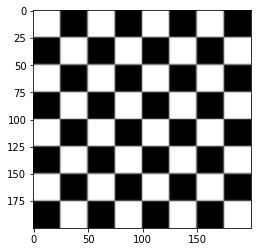

In [98]:
index = 3 #@param {type:"slider", min:1, max:6, step:1}
im,im_type = load_image(image_list[index])
show_image(im)
h,w,ch = get_data(im, im_type)
print('la imagen es de tipo', im_type,' tiene un tamaño de ',h,'x',w,'píxeles y ',ch,'canales')


Al mover el cursor del slider puedo cambiar la imagen a cargar de un listado de imagenes estandar de la librería imageio

Algunas imágenes son tipo RGB y otras son en escala de grises, la función load_image permite identificar el tamaño en pixeles de la imágen y su tipo

In [94]:

scroll_h = 51 #@param {type:"slider", min:0, max:300, step:1}
scroll_w = 0 #@param {type:"slider", min:0, max: 451, step:1}
px = pixel_data(im, scroll_h,scroll_w)

print('Los valores RGB del píxel y=', scroll_h,'x=', scroll_w, 'son', px)





Los valores RGB del píxel y= 51 x= 0 son [255.0, 255.0, 255.0]


Con los cursores de los scrolls puedo moverme en la matriz que representa a la imagen para leer los valores de cada canal de la fila y columna correspondiente en bytes (0:255)


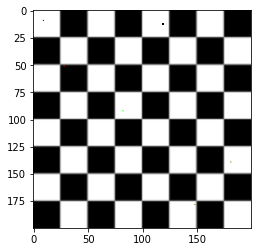

In [106]:

im2 = im
scroll_h = 178 #@param {type:"slider", min:0, max:300, step:1}
scroll_w = 148 #@param {type:"slider", min:0, max: 451, step:1}
scroll_R = 0.4 #@param {type:"slider", min:0, max:1, step:0.05}
scroll_G = 0.6 #@param {type:"slider", min:0, max:1, step:0.05}
scroll_B = 0.1 #@param {type:"slider", min:0, max:1, step:0.05}

im2[y,x,:]=pixel_set(im2, scroll_h, scroll_w, scroll_R,scroll_G,scroll_B)

show_image(im2) 

Con los cursores puedo seleccionar las coordenadas x e y del pixel deseado y variar los valores de los canales RGB, se utilizó la imagen "checkerboard"para poder ver de manera más simple estas modificaciones:
pixel en 51,28 original: negro; actual: rojo

pixel en  9,9 original blanco, actual: azul

pixel en 92,82 original blanco, actual: verde
pixel en 178,148 original blanco, actual: combinacion 40%R, 60%G y 10%B

In [107]:
save_image(im, 'checkerboard.modificada.png')

La función save_image, genera un archivo png nuevo con las modificaciones generadas en el paso anterior